# NAIVE BAYES CLASSIFIER

In [1]:
from google.colab import files
uploaded = files.upload()

Saving tweet_emotions.csv to tweet_emotions.csv


In [8]:
#RANDOM SPLITTER
import numpy as np
from sklearn.model_selection import train_test_split
import math
from csv import reader
labels = []
ids=[]
tweets=[]
number_of_docs = 0

with open('tweet_emotions.csv','r') as read_obj:
  csv_reader=reader(read_obj)
  for row in csv_reader:
    ids.append(row[0])
    labels.append(row[1])
    tweets.append(row[2])

tweets_train, tweets_test, labels_train, labels_test = train_test_split(tweets, labels, test_size=0.2, random_state=33)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect_n_random = CountVectorizer()
X_train_counts_n_random = count_vect_n_random.fit_transform(tweets_train)

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer_n_random = TfidfTransformer()
X_train_tfidf_n_random = tfidf_transformer_n_random.fit_transform(X_train_counts_n_random)

In [5]:
from sklearn.naive_bayes import MultinomialNB #naived bayes 
clf_n_random = MultinomialNB().fit(X_train_tfidf_n_random, labels_train)

In [6]:
X_new_counts_n_random = count_vect_n_random.transform(tweets_test)
print(labels_test)
print(len(labels_test)) #groundtruth
X_new_tfidf_n_random = tfidf_transformer_n_random.transform(X_new_counts_n_random)
predicted_n_random = clf_n_random.predict(X_new_tfidf_n_random)

['neutral', 'neutral', 'love', 'neutral', 'relief', 'enthusiasm', 'sadness', 'neutral', 'sadness', 'neutral', 'happiness', 'neutral', 'neutral', 'hate', 'happiness', 'love', 'worry', 'love', 'hate', 'worry', 'neutral', 'neutral', 'love', 'worry', 'surprise', 'happiness', 'neutral', 'neutral', 'fun', 'sadness', 'happiness', 'neutral', 'empty', 'worry', 'worry', 'surprise', 'worry', 'worry', 'happiness', 'sadness', 'happiness', 'worry', 'worry', 'relief', 'neutral', 'love', 'sadness', 'love', 'love', 'worry', 'worry', 'worry', 'anger', 'neutral', 'neutral', 'sadness', 'hate', 'worry', 'worry', 'worry', 'sadness', 'happiness', 'hate', 'happiness', 'worry', 'happiness', 'neutral', 'sadness', 'happiness', 'enthusiasm', 'worry', 'love', 'worry', 'surprise', 'enthusiasm', 'sadness', 'neutral', 'happiness', 'worry', 'worry', 'fun', 'neutral', 'happiness', 'happiness', 'sadness', 'worry', 'sadness', 'love', 'sadness', 'happiness', 'worry', 'enthusiasm', 'neutral', 'worry', 'fun', 'worry', 'happ

In [7]:
#calculate precision
true_positives=0
false_positives=0
true_negatives=0
false_negatives=0


for index in range(len(labels_test)): #arrays have the same size, dont need 2 loops
  if labels_test[index]==predicted_n_random[index]:
    true_positives+=1
   
  else:
    false_positives+=1
 
precision_n_random=true_positives/(true_positives+false_positives)
print(precision_n_random)

0.2898387701537308


In [8]:
#MANUAL SPLITTER
import math
from csv import reader
labels = []
ids=[]
tweets=[]
training_tweets=[]
test_tweets=[]
training_labels=[]
test_labels=[]
number_of_docs = 0

with open('tweet_emotions.csv','r') as read_obj:
  csv_reader=reader(read_obj)
  for row in csv_reader:
    ids.append(row[0])
    labels.append(row[1])
    tweets.append(row[2])

number_of_docs=len(tweets)
split=math.floor(number_of_docs*0.8)
for doc in range(number_of_docs):
  if doc < split:
    training_tweets.append(tweets[doc])
  else:
   test_tweets.append(tweets[doc])

number_of_labels=len(labels)
splitl=math.floor(number_of_labels*0.8)
for doc in range(number_of_labels):
  if doc < splitl:
    training_labels.append(labels[doc])
  else:
   test_labels.append(labels[doc])

In [9]:
count_vect_n_manual = CountVectorizer()
X_train_counts_n_manual = count_vect_n_manual.fit_transform(training_tweets)

In [10]:
tfidf_transformer_n_manual = TfidfTransformer()
X_train_tfidf_n_manual = tfidf_transformer_n_manual.fit_transform(X_train_counts_n_manual)

In [11]:
clf_n_manual = MultinomialNB().fit(X_train_tfidf_n_manual, training_labels)

In [12]:
X_new_counts_n_manual = count_vect_n_manual.transform(test_tweets)
print(test_labels)
print(len(test_labels)) #groundtruth
X_new_tfidf_n_manual = tfidf_transformer_n_manual.transform(X_new_counts_n_manual)

predicted_n_manual = clf_n_manual.predict(X_new_tfidf_n_manual)

['neutral', 'neutral', 'worry', 'happiness', 'hate', 'happiness', 'neutral', 'worry', 'fun', 'sadness', 'neutral', 'love', 'happiness', 'neutral', 'neutral', 'happiness', 'neutral', 'happiness', 'happiness', 'fun', 'love', 'neutral', 'love', 'neutral', 'neutral', 'neutral', 'happiness', 'fun', 'love', 'love', 'worry', 'sadness', 'happiness', 'neutral', 'happiness', 'sadness', 'neutral', 'fun', 'worry', 'happiness', 'love', 'happiness', 'fun', 'neutral', 'neutral', 'worry', 'neutral', 'neutral', 'happiness', 'happiness', 'neutral', 'neutral', 'sadness', 'love', 'worry', 'neutral', 'love', 'happiness', 'fun', 'worry', 'hate', 'happiness', 'worry', 'worry', 'neutral', 'neutral', 'relief', 'sadness', 'love', 'empty', 'love', 'happiness', 'love', 'surprise', 'love', 'happiness', 'worry', 'hate', 'neutral', 'relief', 'fun', 'sadness', 'sadness', 'love', 'love', 'neutral', 'neutral', 'happiness', 'happiness', 'happiness', 'neutral', 'love', 'happiness', 'neutral', 'happiness', 'worry', 'neutr

In [13]:
#calculate precision
true_positives=0
false_positives=0
true_negatives=0
false_negatives=0


for index in range(len(test_labels)): #arrays have the same size, dont need 2 loops
  if test_labels[index]==predicted_n_manual[index]:
    true_positives+=1
   
  else:
    false_positives+=1
 
precision_n_manual=true_positives/(true_positives+false_positives)
print(precision_n_manual) #naive bayes classifier so low precision

0.1739782527184102


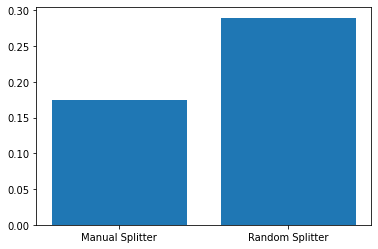

In [14]:
#COMPARING SPLITTING METHODS
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

data = [precision_n_manual,precision_n_random]
plt.bar(['Manual Splitter','Random Splitter'], data)
plt.show()

In [15]:
#CONFUSION MATRIX FOR RANDOM SPLITTING
from sklearn.metrics import confusion_matrix
cm_naive = confusion_matrix(labels_test,predicted_n_random)

Text(69.0, 0.5, 'Truth')

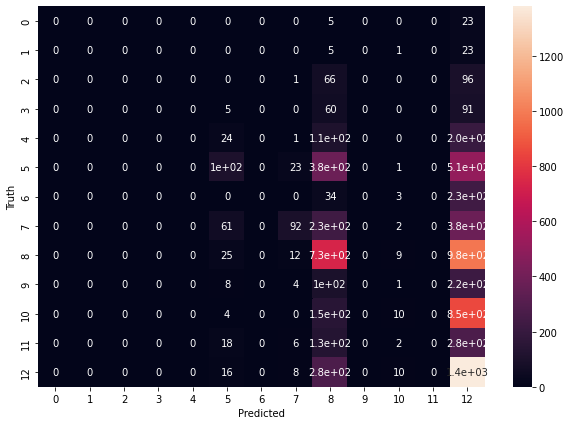

In [16]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm_naive, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

# RANDOM FOREST CLASSIFIER

In [17]:
#RANDOM SPLITTER
import numpy as np
from sklearn.model_selection import train_test_split
import math
from csv import reader
labels = []
ids=[]
tweets=[]
number_of_docs = 0


with open('tweet_emotions.csv','r') as read_obj:
  csv_reader=reader(read_obj)
  for row in csv_reader:
    ids.append(row[0])
    labels.append(row[1])
    tweets.append(row[2])
  

labels.pop(0)
tweets.pop(0)

tweets_train, tweets_test, labels_train, labels_test = train_test_split(tweets, labels, test_size=0.2, random_state=33)

In [18]:
count_vect_r_random = CountVectorizer()
X_train_counts_r_random = count_vect_r_random.fit_transform(tweets_train) #lines-number of documents and distinct words in the columns


In [19]:
tfidf_transformer_r_random = TfidfTransformer()
X_train_tfidf_r_random = tfidf_transformer_r_random.fit_transform(X_train_counts_r_random)

In [20]:
from sklearn.ensemble import RandomForestClassifier
model_r_random = RandomForestClassifier()
model_r_random.fit(X_train_tfidf_r_random,labels_train)

RandomForestClassifier()

In [21]:
X_new_counts_r_random = count_vect_r_random.transform(tweets_test)
X_new_tfidf_r_random = tfidf_transformer_r_random.transform(X_new_counts_r_random)

In [22]:
precision_r_random= model_r_random.score(X_new_tfidf_r_random,labels_test)
print(precision_r_random)

0.33325


In [23]:
import math
from csv import reader
labels = []
ids=[]
tweets=[]
training_tweets=[]
test_tweets=[]
training_labels=[]
test_labels=[]
number_of_docs = 0

with open('tweet_emotions.csv','r') as read_obj:
  csv_reader=reader(read_obj)
  for row in csv_reader:
    ids.append(row[0])
    labels.append(row[1])
    tweets.append(row[2])

number_of_docs=len(tweets)
split=math.floor(number_of_docs*0.8)
for doc in range(number_of_docs):
  if doc < split:
    training_tweets.append(tweets[doc])
  else:
    test_tweets.append(tweets[doc])

number_of_labels=len(labels)
splitl=math.floor(number_of_labels*0.8)
for doc in range(number_of_labels):
  if doc < splitl:
    training_labels.append(labels[doc])
  else:
    test_labels.append(labels[doc])

In [24]:
count_vect_r_manual = CountVectorizer()
X_train_counts_r_manual = count_vect_r_manual.fit_transform(training_tweets)

In [25]:
tfidf_transformer_r_manual = TfidfTransformer()
X_train_tfidf_r_manual = tfidf_transformer_r_manual.fit_transform(X_train_counts_r_manual)

In [26]:
model_r_manual = RandomForestClassifier()
model_r_manual.fit(X_train_tfidf_r_manual,training_labels)

RandomForestClassifier()

In [27]:
X_new_counts_r_manual = count_vect_r_manual.transform(test_tweets)
X_new_tfidf_r_manual = tfidf_transformer_r_manual.transform(X_new_counts_r_manual)

In [28]:
precision_r_manual = model_r_manual.score(X_new_tfidf_r_manual,test_labels)
print(precision_r_manual)

0.31833520809898763


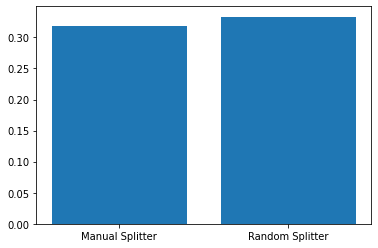

In [29]:
#COMPARE THE SPLITTING METHODS
data = [precision_r_manual,precision_r_random]
plt.bar(['Manual Splitter','Random Splitter'], data)
plt.show()

Text(69.0, 0.5, 'Truth')

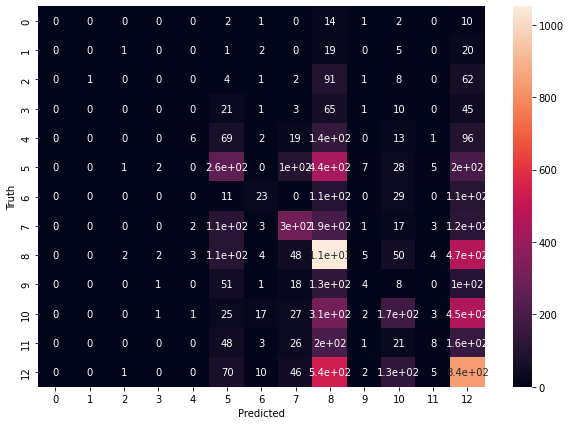

In [30]:
#USING RANDOM METHOD
predicted_labels_randomf = model_r_random.predict(X_new_tfidf_r_random)
cm_randomf = confusion_matrix(labels_test,predicted_labels_randomf)
plt.figure(figsize=(10,7))
sn.heatmap(cm_randomf, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

# SVM MODEL


In [16]:
from google.colab import files
uploaded = files.upload()

Saving tweet_emotions.csv to tweet_emotions (2).csv


In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from csv import reader

In [18]:
#RANDOM SPLITTER
import numpy as np
from sklearn.model_selection import train_test_split
import math
from csv import reader
labels = []
ids=[]
tweets=[]
number_of_docs = 0

with open('tweet_emotions.csv','r') as read_obj:
  csv_reader=reader(read_obj)
  for row in csv_reader:
    ids.append(row[0])
    labels.append(row[1])
    tweets.append(row[2])

tweets.pop(0)
labels.pop(0)

tweets_train, tweets_test, labels_train, labels_test = train_test_split(tweets, labels, test_size=0.2, random_state=33)

In [19]:
count_vect_svm_random = CountVectorizer()
X_train_counts_svm_random = count_vect_svm_random.fit_transform(tweets_train) #lines-number of documents and distinct words in the columns'''


In [20]:
tfidf_transformer_svm_random = TfidfTransformer()
X_train_tfidf_svm_random = tfidf_transformer_svm_random.fit_transform(X_train_counts_svm_random)



In [21]:
X_new_counts_svm_random = count_vect_svm_random.transform(tweets_test)
print(labels_test) #groundtruth
X_new_tfidf_svm_random = tfidf_transformer_svm_random.transform(X_new_counts_svm_random)

['worry', 'love', 'neutral', 'neutral', 'happiness', 'worry', 'neutral', 'empty', 'boredom', 'neutral', 'happiness', 'worry', 'neutral', 'hate', 'neutral', 'love', 'worry', 'love', 'worry', 'happiness', 'love', 'neutral', 'sadness', 'neutral', 'empty', 'happiness', 'neutral', 'worry', 'surprise', 'sadness', 'happiness', 'neutral', 'neutral', 'enthusiasm', 'sadness', 'love', 'worry', 'sadness', 'happiness', 'surprise', 'neutral', 'hate', 'enthusiasm', 'relief', 'love', 'sadness', 'love', 'love', 'love', 'worry', 'neutral', 'sadness', 'neutral', 'neutral', 'happiness', 'enthusiasm', 'neutral', 'sadness', 'neutral', 'worry', 'hate', 'relief', 'hate', 'love', 'sadness', 'happiness', 'sadness', 'empty', 'anger', 'worry', 'neutral', 'love', 'neutral', 'neutral', 'enthusiasm', 'sadness', 'surprise', 'happiness', 'worry', 'happiness', 'fun', 'neutral', 'worry', 'love', 'worry', 'happiness', 'worry', 'neutral', 'worry', 'worry', 'happiness', 'neutral', 'neutral', 'worry', 'fun', 'sadness', 'neu

In [22]:
cls_random = svm.SVC(kernel="linear")
cls_random.fit(X_train_tfidf_svm_random,labels_train)

SVC(kernel='linear')

In [23]:
pred_svm_random = cls_random.predict(X_new_tfidf_svm_random)
accuracy_svm_random=metrics.accuracy_score(labels_test,pred_svm_random)
print(accuracy_svm_random)
print("accuracy: ", metrics.accuracy_score(labels_test,pred_svm_random))


0.358875
accuracy:  0.358875


In [39]:
#MANUAL SPLITTER
import math
from csv import reader
labels = []
ids=[]
tweets=[]
training_tweets=[]
test_tweets=[]
training_labels=[]
test_labels=[]
number_of_docs = 0

with open('tweet_emotions.csv','r') as read_obj:
  csv_reader=reader(read_obj)
  for row in csv_reader:
    ids.append(row[0])
    labels.append(row[1])
    tweets.append(row[2])

number_of_docs=len(tweets)
split=math.floor(number_of_docs*0.8)
for doc in range(number_of_docs):
  if doc < split:
    training_tweets.append(tweets[doc])
  else:
    test_tweets.append(tweets[doc])

number_of_labels=len(labels)
splitl=math.floor(number_of_labels*0.8)
for doc in range(number_of_labels):
  if doc < splitl:
    training_labels.append(labels[doc])
  else:
    test_labels.append(labels[doc])

In [40]:
count_vect_svm_manual = CountVectorizer()
X_train_counts_svm_manual = count_vect_svm_manual.fit_transform(training_tweets)

In [41]:
tfidf_transformer_svm_manual = TfidfTransformer()
X_train_tfidf_svm_manual = tfidf_transformer_svm_manual.fit_transform(X_train_counts_svm_manual)

In [42]:
X_new_counts_svm_manual = count_vect_svm_manual.transform(test_tweets)
print(test_labels) #groundtruth
X_new_tfidf_svm_manual = tfidf_transformer_svm_manual.transform(X_new_counts_svm_manual)

['neutral', 'neutral', 'worry', 'happiness', 'hate', 'happiness', 'neutral', 'worry', 'fun', 'sadness', 'neutral', 'love', 'happiness', 'neutral', 'neutral', 'happiness', 'neutral', 'happiness', 'happiness', 'fun', 'love', 'neutral', 'love', 'neutral', 'neutral', 'neutral', 'happiness', 'fun', 'love', 'love', 'worry', 'sadness', 'happiness', 'neutral', 'happiness', 'sadness', 'neutral', 'fun', 'worry', 'happiness', 'love', 'happiness', 'fun', 'neutral', 'neutral', 'worry', 'neutral', 'neutral', 'happiness', 'happiness', 'neutral', 'neutral', 'sadness', 'love', 'worry', 'neutral', 'love', 'happiness', 'fun', 'worry', 'hate', 'happiness', 'worry', 'worry', 'neutral', 'neutral', 'relief', 'sadness', 'love', 'empty', 'love', 'happiness', 'love', 'surprise', 'love', 'happiness', 'worry', 'hate', 'neutral', 'relief', 'fun', 'sadness', 'sadness', 'love', 'love', 'neutral', 'neutral', 'happiness', 'happiness', 'happiness', 'neutral', 'love', 'happiness', 'neutral', 'happiness', 'worry', 'neutr

In [43]:
cls_svm_manual = svm.SVC(kernel="linear")
cls_svm_manual.fit(X_train_tfidf_svm_manual,training_labels)

SVC(kernel='linear')

In [44]:
pred_svm_manual = cls_svm_manual.predict(X_new_tfidf_svm_manual)
accuracy_svm_manual= metrics.accuracy_score(test_labels,pred_svm_manual)
print(accuracy_svm_manual)
print("accuracy: ", metrics.accuracy_score(test_labels,pred_svm_manual))


0.3628296462942132
accuracy:  0.3628296462942132


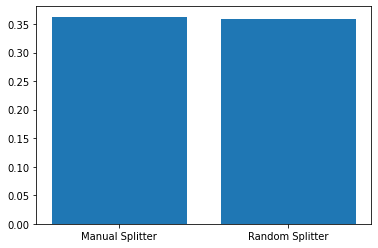

In [45]:
#BAR CHART TO COMPARE TWO SPLITTING METHODS
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

data = [accuracy_svm_manual,accuracy_svm_random]
plt.bar(['Manual Splitter','Random Splitter'], data)
plt.show()

In [2]:
#use different vectorization model

#first splitting the dataset
import numpy as np
from sklearn.model_selection import train_test_split
import math
from csv import reader
labels_diff = []
ids_diff=[]
tweets_diff=[]
number_of_docs = 0


with open('tweet_emotions.csv','r') as read_obj:
  csv_reader=reader(read_obj)
  for row in csv_reader:
    ids_diff.append(row[0])
    labels_diff.append(row[1])
    tweets_diff.append(row[2])
  

labels_diff.pop(0)
tweets_diff.pop(0)

#installing necessary things
!pip install spacy
!python -m spacy download en_core_web_lg


import spacy
import en_core_web_lg
nlp = en_core_web_lg.load()

#vectorizing function
def get_vec(x):
  doc = nlp(x)
  vec = doc.vector
  return vec

vec = [get_vec(x) for x in tweets_diff]

import pandas as pd
vec = pd.DataFrame(vec)
X_diff = vec.to_numpy()
X_diff = X_diff.reshape(-1,1)
X_diff = X_diff.reshape(-1, 300)

#randomly split the dataset
tweets_train_diff, tweets_test_diff, labels_train_diff, labels_test_diff = train_test_split(X_diff, labels_diff, test_size=0.2, random_state=33)


from sklearn import svm
from sklearn.svm import SVC





Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 400.7 MB 6.4 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [11]:
# with only two features "Happiness and Sadness"

import math
from csv import reader
labels_twofeatures = []
ids_twofeatures=[]
tweets_twofeatures=[]

number_of_docs = 0

with open('tweet_emotions.csv','r') as read_obj:
  csv_reader=reader(read_obj)
  for row in csv_reader:
    if row[1] == "happiness" or row[1] == "sadness":
      ids_twofeatures.append(row[0])
      labels_twofeatures.append(row[1])
      tweets_twofeatures.append(row[2])


tweets_train_twofeatures, tweets_test_twofeatures, labels_train_twofeatures, labels_test_twofeatures = train_test_split(tweets_twofeatures, labels_twofeatures, test_size=0.2, random_state=33)

count_vect_twofeatures = CountVectorizer()
X_train_counts_twofeatures = count_vect_twofeatures.fit_transform(tweets_train_twofeatures)

tfidf_transformer_twofeatures = TfidfTransformer()
X_train_tfidf_twofeatures = tfidf_transformer_twofeatures.fit_transform(X_train_counts_twofeatures)


cls_random_twofeatures = svm.SVC(kernel="linear")
cls_random_twofeatures.fit(X_train_tfidf_twofeatures,labels_train_twofeatures)

X_new_counts_svm_twofeatures = count_vect_twofeatures.transform(tweets_test_twofeatures)
X_new_tfidf_svm_twofeatures = tfidf_transformer_twofeatures.transform(X_new_counts_svm_twofeatures)

pred_svm_twofeatures  = cls_random_twofeatures.predict(X_new_tfidf_svm_twofeatures)
accuracy_svm_twofeatures =metrics.accuracy_score(labels_test_twofeatures,pred_svm_twofeatures)
print("accuracy: ", accuracy_svm_twofeatures)


accuracy:  0.8057831325301205


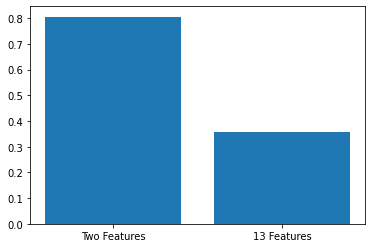

In [24]:
#BAR CHART TO COMPARE Different number of features
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

data = [accuracy_svm_twofeatures,accuracy_svm_random]
plt.bar(['Two Features','13 Features'], data)
plt.show()

In [26]:
from sklearn import metrics
#training SVM model
cls_diff = svm.SVC(kernel="linear")
cls_diff.fit(tweets_train_diff,labels_train_diff)
#print accuracy
pred_diff = cls_diff.predict(tweets_test_diff)
ac = metrics.accuracy_score(labels_test_diff,pred_diff)
print("accuracy: ",ac)

accuracy:  0.348125


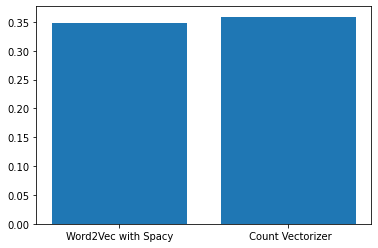

In [27]:
#BAR CHART TO COMPARE TWO VECTORIZATION METHODS
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

data = [ac,accuracy_svm_random]
plt.bar(['Word2Vec with Spacy',' Count Vectorizer'], data)
plt.show()

In [ ]:
#USING MANUAL SPLITTER 
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(test_labels,pred_svm_manual)

Text(69.0, 0.5, 'Truth')

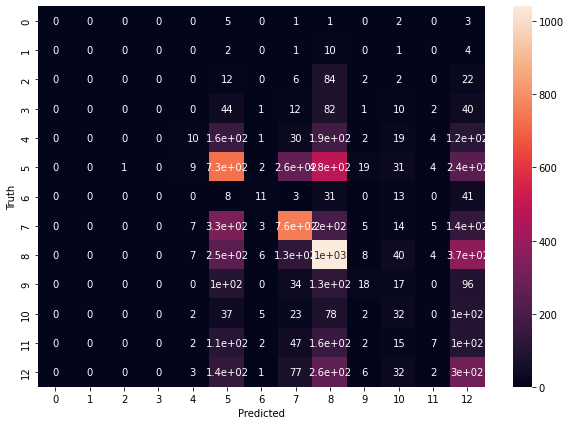

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm_svm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

# USE THE SCRIPTS IN THE MODEL


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving m0u0BiancaLines.txt to m0u0BiancaLines.txt
Saving m0u1BruceLines.txt to m0u1BruceLines.txt
Saving m0u2CameronLines.txt to m0u2CameronLines.txt
Saving m0u3ChastityLines.txt to m0u3ChastityLines.txt
Saving m0u4JoeyLines.txt to m0u4JoeyLines.txt
Saving m0u5KatLines.txt to m0u5KatLines.txt
Saving m0u6MandellaLines.txt to m0u6MandellaLines.txt
Saving m0u7MichaelLines.txt to m0u7MichaelLines.txt
Saving m0u8MissPerkyLines.txt to m0u8MissPerkyLines.txt
Saving m0u9PatrickLines.txt to m0u9PatrickLines.txt
Saving m0u10SharonLines.txt to m0u10SharonLines.txt
Saving m0u11WalterLines.txt to m0u11WalterLines.txt
Saving onlytext.txt to onlytext (1).txt


In [ ]:
emotions=['empty','sadness','neutral','enthusiasm','worry','surprise','love','fun','hate','relief']

In [ ]:
with open('onlytext.txt', 'r') as f:
    lines = [line.strip() for line in f]

m0lines = []
i = 0
while i<len(lines):
  m0lines.append(lines[i])
    
  i+=1
print(m0lines)

['They do not!', 'They do to!', 'I hope so.', 'She okay?', "Let's go.", 'Wow', "Okay -- you're gonna need to learn how to lie.", 'No', 'I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?', 'Like my fear of wearing pastels?', 'The "real you".', 'What good stuff?', "I figured you'd get to the good stuff eventually.", 'Thank God!  If I had to hear one more story about your coiffure...', "Me.  This endless ...blonde babble. I'm like, boring myself.", 'What crap?', 'do you listen to this crap?', 'No...', 'Then Guillermo says, "If you go any lighter, you\'re gonna look like an extra on 90210."', 'You always been this selfish?', 'But', "Then that's all you had to say.", 'Well, no...', "You never wanted to go out with 'me, did you?", 'I was?', 'I looked for you back at the party, but you always seemed to be "occupied".', 'Tons', 'Have fun tonight?', 'I believe we share an art instructor', 'You know Chastity?', 'Looks like things worked out t

In [ ]:
movieLines_counts = count_vect_svm_random.transform(m0lines)
movieLines_tfidf = tfidf_transformer_svm_random.transform(movieLines_counts)
predicted_movie = cls_random.predict(movieLines_tfidf)
print(predicted_movie)

['neutral' 'neutral' 'worry' 'worry' 'neutral' 'surprise' 'worry'
 'sadness' 'neutral' 'worry' 'neutral' 'happiness' 'neutral' 'happiness'
 'worry' 'worry' 'worry' 'sadness' 'neutral' 'neutral' 'sadness'
 'happiness' 'sadness' 'worry' 'happiness' 'neutral' 'neutral' 'happiness'
 'neutral' 'neutral' 'worry' 'neutral' 'neutral' 'sadness' 'worry' 'worry'
 'worry' 'sadness' 'neutral' 'worry' 'worry' 'love' 'neutral' 'worry'
 'neutral' 'worry' 'neutral' 'worry' 'worry' 'neutral' 'happiness' 'worry'
 'neutral' 'worry' 'worry' 'worry' 'sadness' 'worry' 'worry' 'worry'
 'worry' 'neutral' 'worry' 'neutral' 'love' 'neutral' 'worry' 'neutral'
 'sadness' 'neutral' 'worry' 'worry' 'worry' 'neutral' 'worry' 'worry'
 'worry' 'neutral' 'sadness' 'neutral' 'happiness' 'neutral' 'neutral'
 'neutral' 'worry' 'sadness' 'neutral' 'neutral' 'worry' 'neutral'
 'neutral' 'happiness' 'neutral' 'neutral' 'worry' 'neutral' 'neutral'
 'worry' 'neutral' 'worry' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'w

In [ ]:
emo_counter = [0]*13
indexCounter = 0
for i in emotions:
  for j in predicted_movie:
    if i == j:
      emo_counter[indexCounter] += 1
  indexCounter+=1

print(emo_counter)

[0, 34, 328, 0, 237, 4, 20, 2, 9, 0, 0, 0, 0]


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

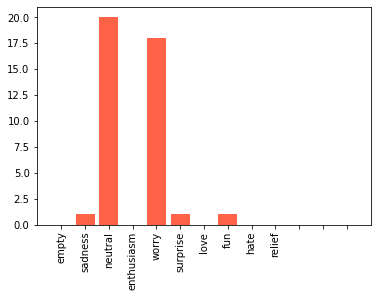

In [ ]:
x = np.arange(13)
plt.bar(x, emo_counter,color='tomato')
plt.xticks(x, emotions, rotation="vertical");

In [ ]:
emotions_counted = []

allFiles = ["m0u0BiancaLines.txt","m0u1BruceLines.txt","m0u2CameronLines.txt","m0u3ChastityLines.txt","m0u4JoeyLines.txt","m0u5KatLines.txt","m0u6MandellaLines.txt","m0u7MichaelLines.txt","m0u8MissPerkyLines.txt","m0u9PatrickLines.txt","m0u10SharonLines.txt","m0u11WalterLines.txt"]

characters = ["Bianca","Bruce","Cameron","Chastity","Joey","Kat","Mandella","Michael","MissPerky","Patrick","Sharon","Walter"]

m = 0
for i in allFiles:  
  with open(i, 'r') as f:
      lines = [line.strip() for line in f]

  characterLines = []
  j = 0
  while j<len(lines):
    characterLines.append(lines[j])
      
    j+=1
  print(characterLines)

  characterLines_counts = count_vect_svm_random.transform(characterLines)
  characterLines_tfidf = tfidf_transformer_svm_random.transform(characterLines_counts)
  predicted_character = cls_random.predict(characterLines_tfidf)
  print(predicted_character)

  emo_counter = [0]*13
  indexCounter = 0
  for i1 in emotions:
    for i2 in predicted_character:
      if i1 == i2:
        emo_counter[indexCounter] += 1
    indexCounter+=1

  print(emo_counter)
  emotions_counted.append(emo_counter)



['They do not!', 'I hope so.', "Let's go.", "Okay -- you're gonna need to learn how to lie.", 'I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?', 'Like my fear of wearing pastels?', 'What good stuff?', "Me.  This endless ...blonde babble. I'm like, boring myself.", 'do you listen to this crap?', 'Then Guillermo says, "If you go any lighter, you\'re gonna look like an extra on 90210."', 'But', 'Well, no...', 'I was?', 'Tons', 'You know Chastity?', 'Hi.', "Who knows?  All I've ever heard her say is that she'd dip before dating a guy that smokes.", "Lesbian?  No. I found a picture of Jared Leto in one of her drawers, so I'm pretty sure she's not harboring same-sex tendencies.", "I really, really, really wanna go, but I can't.  Not unless my sister goes.", "Eber's Deep Conditioner every two days. And I never, ever use a blowdryer without the diffuser attachment.", "You're sweet.", "I counted on you to help my cause. You and that thug a

Text(0.5, 1.0, 'Bianca')

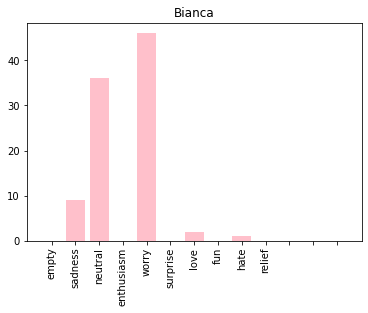

In [ ]:
x = np.arange(13)
plt.bar(x, emotions_counted[0],color='pink')
plt.xticks(x, emotions, rotation="vertical");
plt.title(characters[0])


Text(0.5, 1.0, 'Bruce')

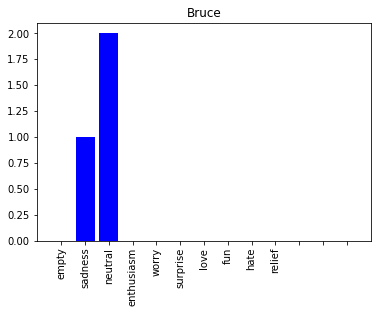

In [ ]:
y = np.arange(13)
plt.bar(y, emotions_counted[1],color='blue')
plt.xticks(y, emotions, rotation="vertical");
plt.title(characters[1])


Text(0.5, 1.0, 'Cameron')

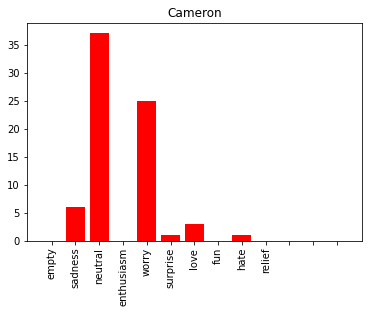

In [ ]:
z = np.arange(13)
plt.bar(z, emotions_counted[2],color='red')
plt.xticks(z, emotions, rotation="vertical");
plt.title(characters[2])


Text(0.5, 1.0, 'Chastity')

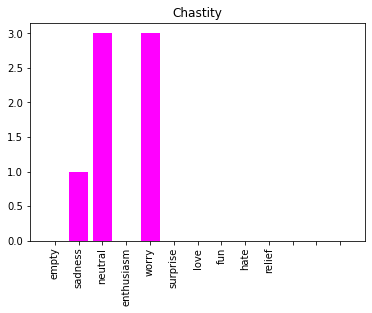

In [ ]:
a = np.arange(13)
plt.bar(a, emotions_counted[3],color='magenta')
plt.xticks(a, emotions, rotation="vertical");
plt.title(characters[3])

Text(0.5, 1.0, 'Joey')

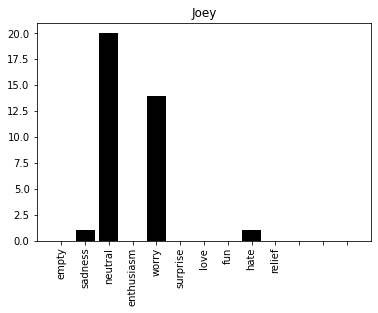

In [ ]:
b = np.arange(13)
plt.bar(b, emotions_counted[4],color='black')
plt.xticks(b, emotions, rotation="vertical");
plt.title(characters[4])

Text(0.5, 1.0, 'Kat')

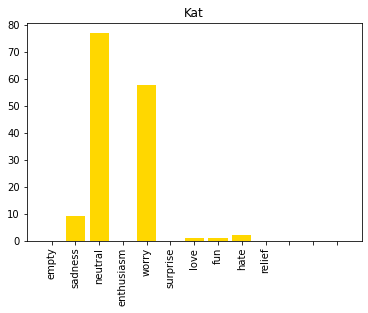

In [ ]:
c = np.arange(13)
plt.bar(c, emotions_counted[5],color='gold')
plt.xticks(c, emotions, rotation="vertical");
plt.title(characters[5])

Text(0.5, 1.0, 'Mandella')

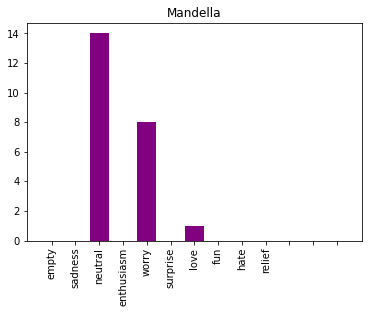

In [ ]:
d = np.arange(13)
plt.bar(d, emotions_counted[6],color='purple')
plt.xticks(d, emotions, rotation="vertical");
plt.title(characters[6])

Text(0.5, 1.0, 'Michael')

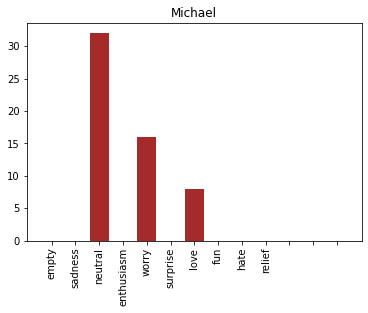

In [ ]:
e = np.arange(13)
plt.bar(e, emotions_counted[7],color='brown')
plt.xticks(e, emotions, rotation="vertical");
plt.title(characters[7])

Text(0.5, 1.0, 'MissPerky')

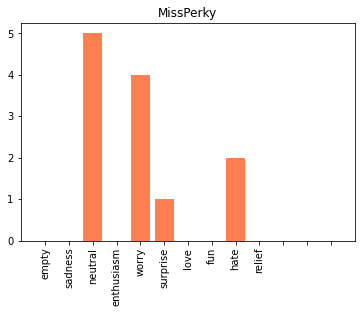

In [ ]:
f = np.arange(13)
plt.bar(f, emotions_counted[8],color='coral')
plt.xticks(f, emotions, rotation="vertical");
plt.title(characters[8])

Text(0.5, 1.0, 'Patrick')

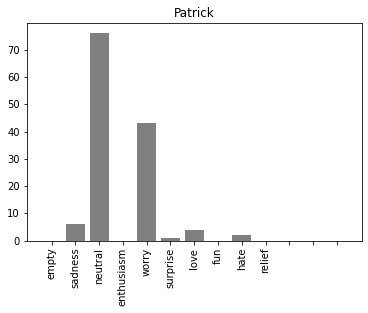

In [ ]:
g = np.arange(13)
plt.bar(g, emotions_counted[9],color='grey')
plt.xticks(g, emotions, rotation="vertical");
plt.title(characters[9])

Text(0.5, 1.0, 'Sharon')

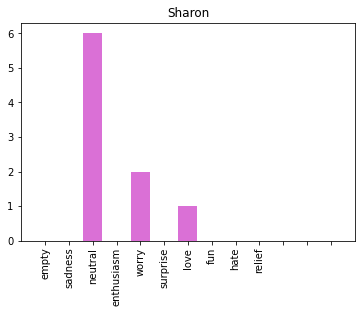

In [ ]:
h = np.arange(13)
plt.bar(h, emotions_counted[10],color='orchid')
plt.xticks(h, emotions, rotation="vertical");
plt.title(characters[10])